# Module 2 Assignment - Twitter Dataset

In [9]:
import pandas as pd

# Load the Kaggle Twitter dataset
df = pd.read_csv('downloads/sample_twitter_network.csv')

# Display the first few rows to inspect the data
df.head()

,user_id,follower_id
0,user_5,user_20
1,user_6,user_19
2,user_14,user_20
3,user_2,user_4
4,user_11,user_10


# Data Cleaning

In [14]:
df = df.drop_duplicates()

# Drop rows with missing follower data
df = df.dropna(subset=['follower_id'])
df.head()

,user_id,follower_id
0,user_5,user_20
1,user_6,user_19
2,user_14,user_20
3,user_2,user_4
4,user_11,user_10


# Graph Construction

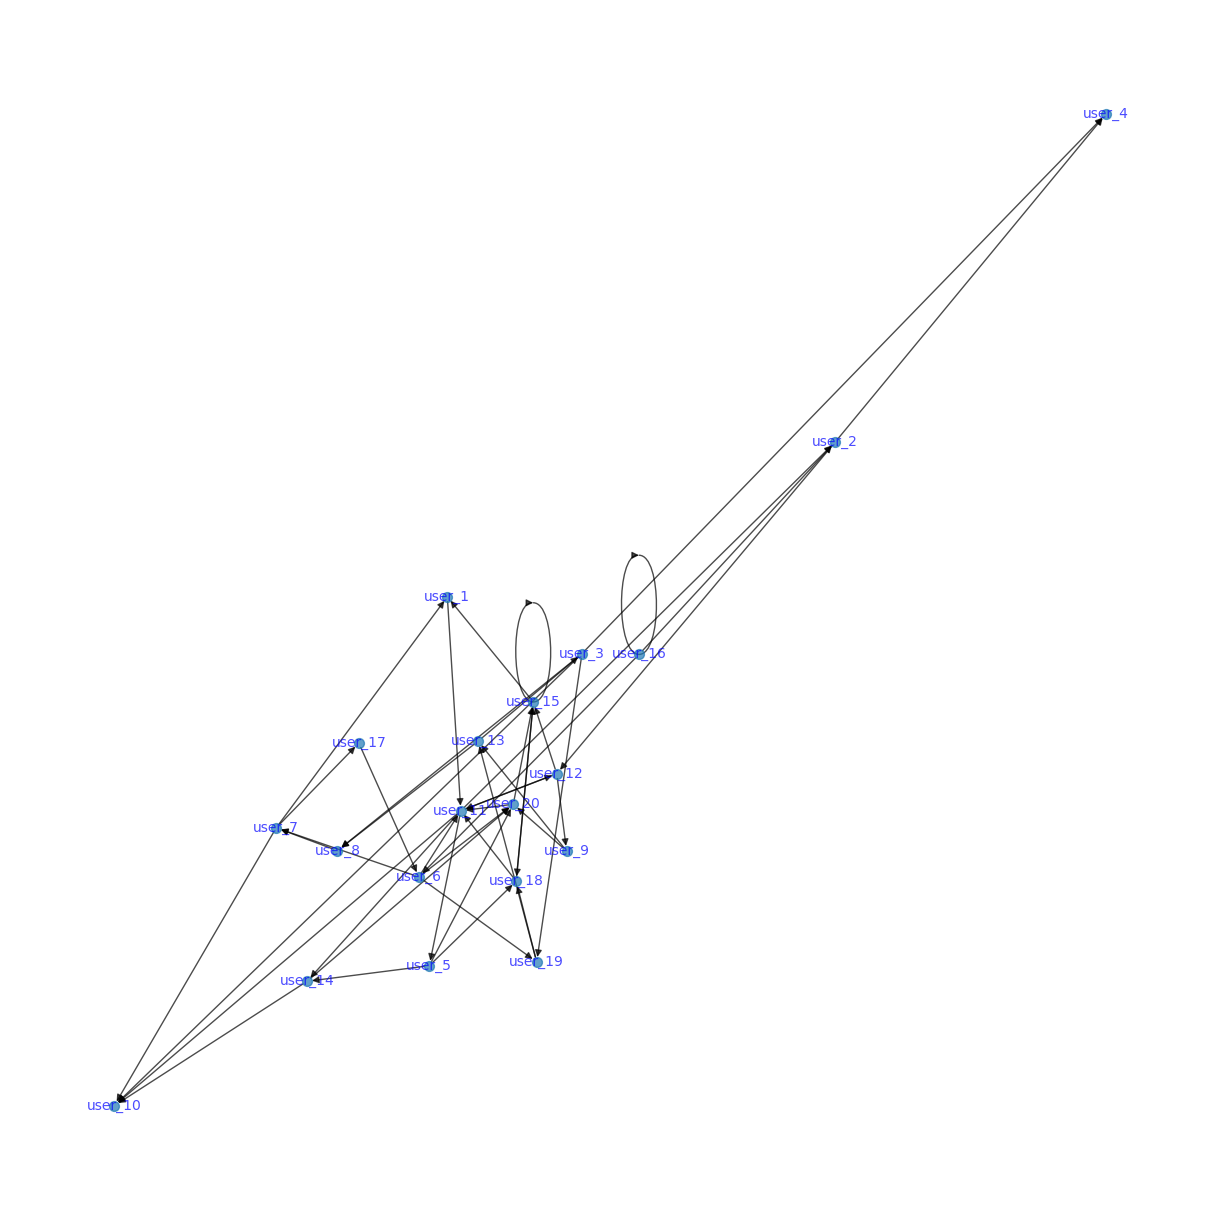

In [10]:
import networkx as nx

# Create an empty directed graph
G = nx.DiGraph()

# Add edges from the dataset (user -> follower)
for index, row in df.iterrows():
    G.add_edge(row['user_id'], row['follower_id'])

# Visualize the graph (optional, may be large for a full dataset)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=True, node_size=50, font_size=10, font_color="blue", alpha=0.7)
plt.show()

# Defining Importance

In [16]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)

# Calculate PageRank
pagerank = nx.pagerank(G)

# Get the top 3 important nodes based on Degree Centrality and PageRank
top_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:3]
top_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:3]

top_degree_centrality, top_pagerank

([('user_11', 0.5263157894736842),
  ('user_15', 0.3684210526315789),
  ('user_20', 0.3157894736842105)],
 [('user_11', 0.13874321519247515),
  ('user_15', 0.11332599961192324),
  ('user_10', 0.07465262564859051)])